In [1]:
import networkx as nx
import matplotlib.pyplot as plt

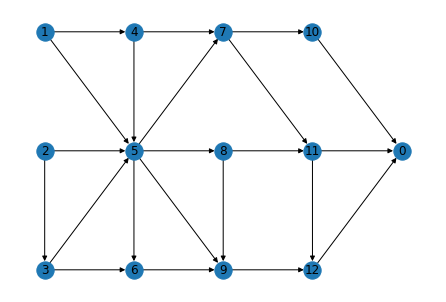

In [2]:
# Define a graph
G_plot = nx.DiGraph()
G_plot.add_edges_from([(1, 4), (1, 5), (2, 3), (2, 5), (3, 5), (3, 6), (4, 5), (4, 7), (5, 6), (5, 7), 
                  (5, 8), (5, 9), (6, 9), (7, 10), (7, 11), (8, 9), (8, 11), (9, 12), (10, 0), (11, 12), (11, 0),
                  (12, 0)])

pos = {0: (4, 1), 1: (0, 2), 2: (0, 1), 3: (0, 0), 4: (1, 2), 5: (1, 1), 6:(1, 0), 7: (2, 2), 8: (2, 1), 9: (2, 0), 
       10: (3, 2), 11: (3, 1), 12: (3, 0)}
n=12
# Draw the graph
nx.draw(G_plot, pos=pos, with_labels=True)  # Draw nodes and edges
plt.show()  # Display the graph

G = nx.DiGraph()
G.add_edges_from([(1, 4), (1, 5), (2, 3), (2, 5), (3, 5), (3, 6), (4, 5), (4, 7), (5, 6), (5, 7), 
                  (5, 8), (5, 9), (6, 9), (7, 10), (7, 11), (8, 9), (8, 11), (9, 12), (11, 12)])

In [3]:
# Calculate the adjacency matrix A
A = nx.adjacency_matrix(G, range(1, n+1)).todense()
print("Adjacency matrix A:\n", A)

idx = 1
currA = A
delta = 0
while (currA.sum() != 0):
    idx += 1
    delta += currA
    currA = currA @ A 
    print(f"\nAdjacency matrix A_{idx}:\n", currA)
print("\nDelta:\n", delta)

Adjacency matrix A:
 [[0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Adjacency matrix A_2:
 [[0 0 0 0 1 1 2 1 1 0 0 0]
 [0 0 0 0 1 2 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 2 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 2 1 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Adjacency matrix A_3:
 [[0 0 0 0 0 1 1 1 3 2 3 1]
 [0 0 0 0 0 1 1 1 4 1 2 1]
 [0 0 0 0 0 0 0 0 2 1 2 2]
 [0 0 0 0 0 0 0 0 2 1 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0

/var/folders/2k/n9362ktx4hzctxmb23t1jv8m0000gn/T/ipykernel_50779/2466777551.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, range(1, n+1)).todense()


In [4]:
# get the nodes with in and out arrows
intermediate_nodes = []

for node in G.nodes:
    in_degree = G.in_degree(node)
    out_degree = G.out_degree(node)
    
    if in_degree > 0 and out_degree > 0:
        intermediate_nodes.append(node)
        
print("Intermediate nodes:", intermediate_nodes)
print("\nCoefficient of intermediate elements:", len(intermediate_nodes)/len(G))


Intermediate nodes: [4, 5, 3, 6, 7, 8, 9, 11]

Coefficient of intermediate elements: 0.6666666666666666


In [7]:
num_internal_connections = 0

for node in G.nodes():
    neighbors = set(G.neighbors(node))
    for neighbor in neighbors:
        if node < neighbor and neighbor in neighbors:
            num_internal_connections += 1
            
print("Number of internal connections: ", num_internal_connections)


Number of internal connections:  19
